<a href="https://colab.research.google.com/github/Sushmithaa-Pandian/Machine_learning_sush/blob/main/Copy_of_Malaybert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [5]:

df=pd.read_pickle('/content/gdrive/MyDrive/malaya_fake_news_preprocessed_dataframe.pkl')

In [6]:
df=df.head(15000)

In [7]:
df.shape

(15000, 7)

In [8]:
df.head()

,news,tokens,rejoined,length,label,real,fake
0,demi lovato telah jujur kejam tentang pertempu...,"[demi, lovato, telah, jujur, kejam, tentang, p...",demi lovato telah jujur kejam tentang pertempu...,448,1,1,0
1,selamat pagi inilah yang perlu anda ketahui se...,"[selamat, pagi, inilah, yang, perlu, anda, ket...",selamat pagi inilah yang perlu anda ketahui se...,682,1,1,0
2,tahniah untuk bintang glee lea michele pelakon...,"[tahniah, untuk, bintang, glee, lea, michele, ...",tahniah untuk bintang glee lea michele pelakon...,247,1,1,0
3,ia adalah satu kejutan yang mengejutkan untuk ...,"[ia, adalah, satu, kejutan, yang, mengejutkan,...",ia adalah satu kejutan yang mengejutkan untuk ...,718,1,1,0
4,transkrip minggu ini dengan george stephanopou...,"[transkrip, minggu, ini, dengan, george, steph...",transkrip minggu ini dengan george stephanopou...,668,1,1,0


In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Fake - 0 /Real - 1 News')

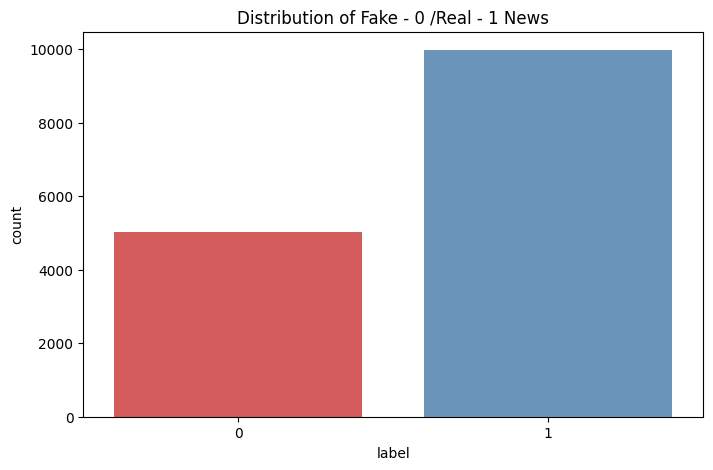

In [11]:
df['num_words'] = df['news'].apply(lambda x: len(x.split()))
plt.figure(figsize = (8,5))
sns.countplot(x = df['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Fake - 0 /Real - 1 News')

In [12]:
target_count = df.label.value_counts()

In [13]:
count_class_0, count_class_1 = df.label.value_counts()

# Divide by class
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]

Random under-sampling:
1    5028
0    5028
Name: label, dtype: int64


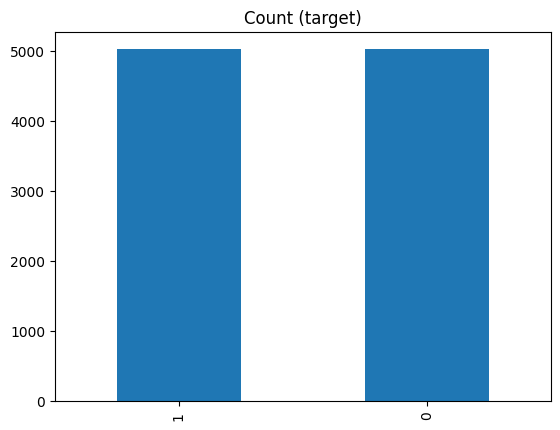

In [14]:
df_class_1_under = df_class_1.sample(count_class_1)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under.label.value_counts())

df_test_under.label.value_counts().plot(kind='bar', title='Count (target)');

In [15]:
df_test_under.shape

(10056, 8)

In [21]:
dfnew=df_test_under[["news","label"]]

In [24]:
dfnew.reset_index(inplace=True, drop=True)

In [26]:
dfnew

,news,label
0,dalam wawancara siaran pertama sejak berangkat...,1
1,1 closetspaceclosetspace adalah aplikasi mudah...,1
2,washington donald j berturut turut bertemu pad...,1
3,tidak begitu cepat mirada membuka kehamilannya...,1
4,pengiring pengantin yang paling terkenal di du...,1
...,...,...
10051,rasmi israeli diam diam melawat dubai laporan ...,0
10052,"yang diposkan pada oktober 28 , 2016 oleh dmit...",0
10053,dapatkan kisah harian terbesar melalui melangg...,0
10054,kesihatan amerika semakin berkurangan di bawah...,0


In [ ]:
dfnew.shape

(10056, 2)

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import gc

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.python.client import device_lib
from transformers import AutoTokenizer, TFBertModel

SEED = 10

In [ ]:
X=dfnew["news"]
y=dfnew["label"]

In [ ]:

MAX_LEN = 100

def get_model():
    dropout_rate = 0.2

    input_ids = Input(shape = (MAX_LEN,), dtype = tf.int32, name = 'input_ids')
    input_mask = Input(shape = (MAX_LEN,), dtype = tf.int32, name = 'input_mask')

    embeddings = bert([input_ids, input_mask])[1] #pooler output
    print(embeddings)

    out = Dropout(0.2)(embeddings)

    #64 units dense layer
    out = Dense(64,activation = 'relu')(out)
    out = Dropout(0.2)(out)

    y = Dense(1,activation = 'sigmoid')(out)

    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True

    #define optimizer
    optimizer = Adam(learning_rate=1e-05)

    #complile the model
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

    return model

#define tokenization function
def get_tokens(X):

    X = tokenizer(
                text = list(X),
                add_special_tokens = True,
                max_length = MAX_LEN,
                truncation = True,
                padding = True,
                return_tensors = 'tf',
                return_token_type_ids = False,
                return_attention_mask = True,
                verbose = True
                )

    return X

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("primasr/malaybert-for-eqa-finetuned")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['qa_outputs.bias', 'bert.embeddings.position_ids', 'qa_outputs.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertModel were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='tf_bert_model/bert/pooler/dense/Tanh:0', description="created by layer 'tf_bert_model'")


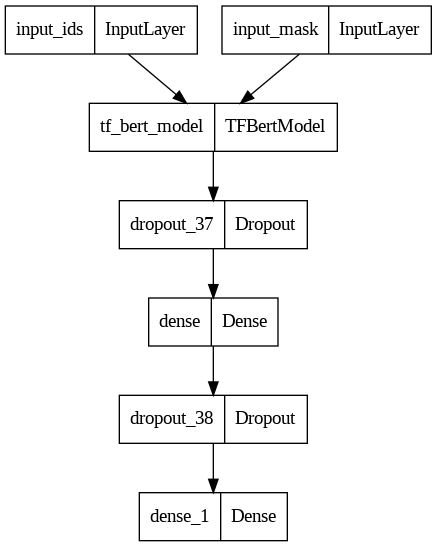

In [ ]:
bert = TFBertModel.from_pretrained("primasr/malaybert-for-eqa-finetuned",from_pt=True)

model = get_model()
tf.keras.utils.plot_model(model)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = SEED)

In [ ]:
X_train_seq = get_tokens(X_train)
X_test_seq = get_tokens(X_test)

history = model.fit(x = {'input_ids':X_train_seq['input_ids'],'input_mask':X_train_seq['attention_mask']},
                    y = y_train, epochs=7,
                    validation_split = 0.2, batch_size = 32, callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, verbose=False,restore_best_weights=True)],workers=10)

Epoch 1/7
202/202 [==============================] - 152s 753ms/step - loss: 0.0459 - accuracy: 0.9848 - val_loss: 0.4297 - val_accuracy: 0.8888
Epoch 2/7
202/202 [==============================] - 149s 736ms/step - loss: 0.0617 - accuracy: 0.9767 - val_loss: 0.5024 - val_accuracy: 0.8800
Epoch 3/7
202/202 [==============================] - 149s 737ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.4858 - val_accuracy: 0.8975
Epoch 4/7
202/202 [==============================] - 148s 735ms/step - loss: 0.0271 - accuracy: 0.9899 - val_loss: 0.5170 - val_accuracy: 0.8850
Epoch 5/7
202/202 [==============================] - 148s 735ms/step - loss: 0.0182 - accuracy: 0.9952 - val_loss: 0.5803 - val_accuracy: 0.8937
Epoch 6/7
202/202 [==============================] - 140s 691ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.5611 - val_accuracy: 0.8925
Epoch 1/7
202/202 [==============================] - 150s 740ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.5212 - val_ac

In [ ]:
test_loss, test_accuracy = model.evaluate(
    x={'input_ids': X_test_seq['input_ids'], 'input_mask': X_test_seq['attention_mask']},
    y=y_test
)

63/63 [==============================] - 14s 220ms/step - loss: 0.5319 - accuracy: 0.8767


In [ ]:
print("Test loss:", test_loss)
print("Test accuracy",test_accuracy)

Test loss: 0.5319026708602905
Test accuracy 0.8767395615577698


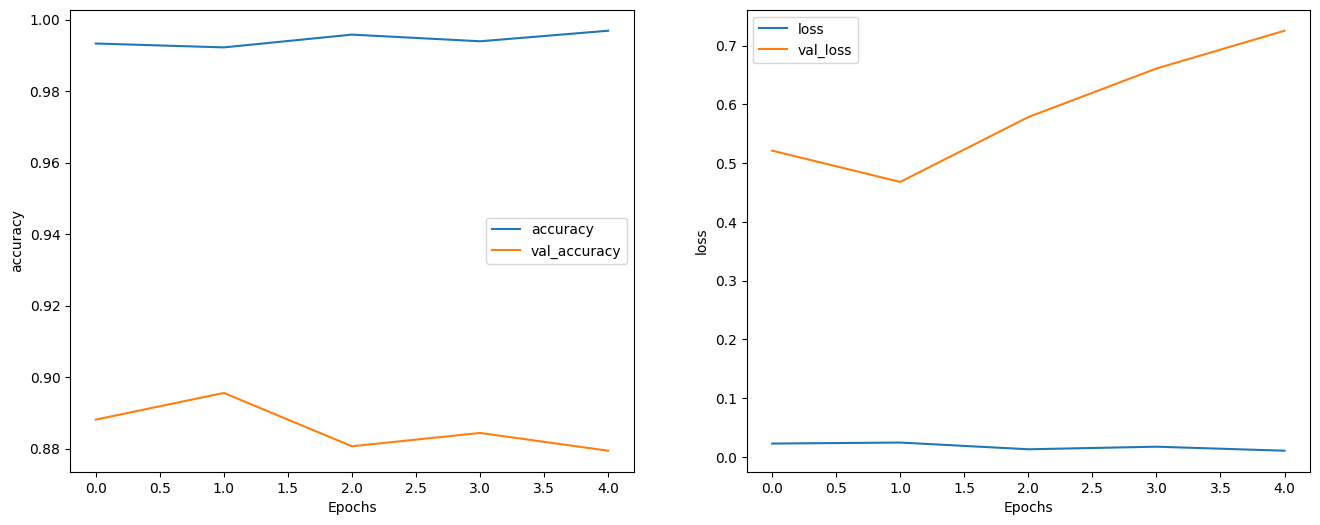

In [ ]:
def plot_graphs(history, metric):

    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [ ]:
yhat =  np.where(model.predict({'input_ids':X_test_seq['input_ids'],'input_mask':X_test_seq['attention_mask']}) >=0.5,1,0)

63/63 [==============================] - 17s 226ms/step


In [ ]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1006
           1       0.86      0.90      0.88      1006

    accuracy                           0.88      2012
   macro avg       0.88      0.88      0.88      2012
weighted avg       0.88      0.88      0.88      2012



Text(70.72222222222221, 0.5, 'Real Labels')

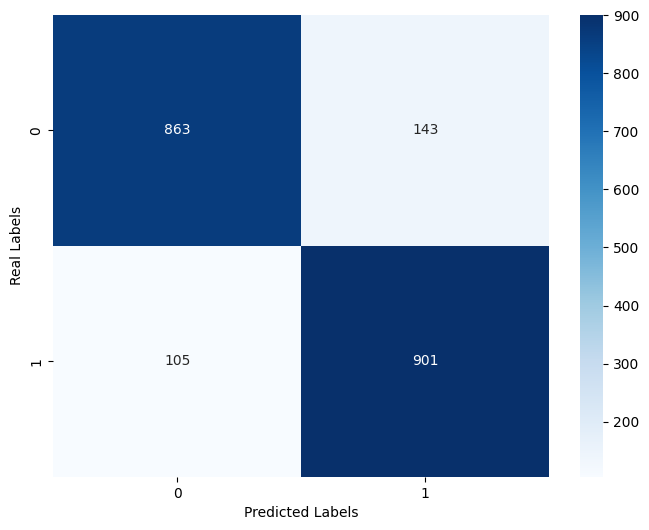

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,yhat), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [ ]:
model.save('fake_news_bert.h5')
model.save_weights("fake_news_bert_weights")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
